# NLP Project

# Business Use-Case
**Improve Movie Audience Satisfaction and Box Office Performance through Sentiment Analysis of IMDB Reviews.**


### Objective: 
Use sentiment analysis on IMDB movie reviews to understand audience sentiments and identify factors influencing positive and negative opinions. This analysis will enable movie studios to make data-driven decisions, enhancing audience satisfaction, and maximizing box office performance.

# Importing Libraries

In [122]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import nltk
# nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_auc_score


import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## Reading the Data 

In [93]:
df = pd.read_csv('Review.csv')
# Check first five rows of the data
df.head()

sentiment                                             review
0  Negative  I had no background knowledge of this movie be...
1  Negative  I am a huge Jane Austen fan and I ordered the ...
2  Negative  Nothing to say but Wow! Has anyone actually ha...
3  Negative  i like Jane Austin novels. I love Pride and Pr...
4  Negative  In this day and age of incredible special movi...

In [94]:
df.tail()

sentiment                                             review
9995  Positive  I first saw this movie back in the early'90's ...
9996  Positive  NYC, 2022: The Greenhouse effect, vanished oce...
9997  Positive  Those individuals familiar with Asian cinema, ...
9998  Positive  The kids, aged 7 to 14, got such a huge kick o...
9999  Positive  I so love this movie! The animation is great (...

## Understanding theData

In [95]:
# check the dimensions of the data 
df.shape

(10000, 2)

In [96]:
# check the data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  10000 non-null  object
 1   review     10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [97]:
# statistical summary of the data 
df.describe()

sentiment                                             review
count      10000                                              10000
unique         2                                               9990
top     Negative  This show comes up with interesting locations ...
freq        5081                                                  3

In [55]:
# check nulls
df.isna().sum()

sentiment    0
review       0
dtype: int64

In [56]:
# drop duplicate rows from the data 
df.drop_duplicates(inplace=True)
df.shape

(9990, 2)

In [57]:
# Count the number of positive and negative reviews
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts

Negative    5073
Positive    4917
Name: sentiment, dtype: int64

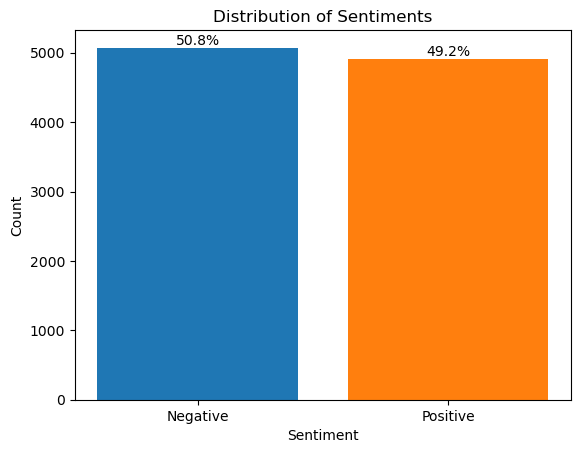

In [58]:
# Plot the sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values, color=('tab:blue','tab:orange'))
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Add percentages on top of each bar
total = sum(sentiment_counts.values)
for i, count in enumerate(sentiment_counts.values):
    percentage = count / total * 100
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

**Inference**

- The distribution of sentiments in our data is almost equally distributed. 

- Therefore, we can say that we have a balanced data 

## Text preprocessing

In [59]:
# Remove all the special characters
stop_words = set(stopwords.words('english'))
# Define a function to clean the text using regular expressions
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove any non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stop_words]
    text = ' '.join(tokens)
    
    return text

In [60]:
lemmatizer = WordNetLemmatizer()

In [61]:
# Clean the 'review' column and apply the clean text function here
df['review'] = df['review'].apply(clean_text)
df['review'].head() 

0    background knowledge movie bought sounded cool...
1    huge jane austen fan ordered movie amazonuk co...
2    nothing say wow anyone actually somebody sneak...
3    like jane austin novels love pride prejudice s...
4    day age incredible special movie effects one s...
Name: review, dtype: object

In [62]:
df['review'][0]

'background knowledge movie bought sounded cool ive wanting see really kickbutt viking movie awhile alas film looking hoped best instead delivered boring nordic soapopera seemed drag long despite 84 minute running time films premise intriguing enough viking warlord defies god odin enraged curses warlords son named barek death rebirth berserker barek guy forced live enraged insane violent lifetime lifetime movie filmed competently enough rich cinematography quasigood performances actors found bored questioning dribble would end filmmakers chance make something rather entertaining semiunique dropped ball perhaps couldve improved cheap exploitation tactics thrown gratuitous nudity lots gore mean talking berserkers arent vikings supposed bad enough raping pillaging arent berserkers supposed even extreme unless youre fan young restless etc fact insane berserker likes self torture id probably steer clear drab piece celluloid'

## WordCloud

### WordCloud for whole data 

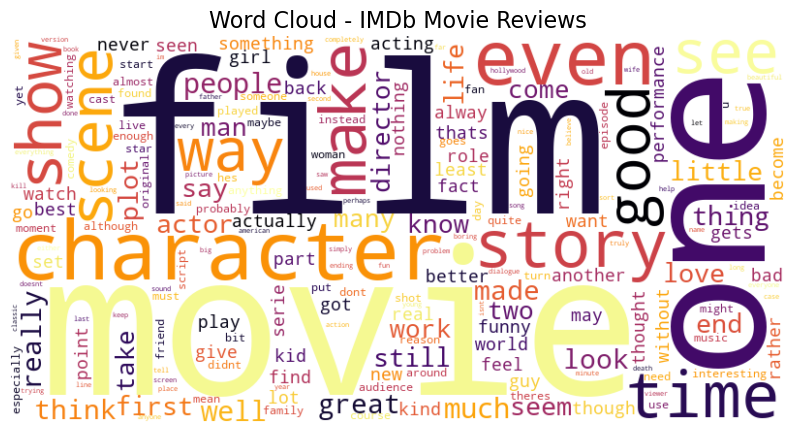

In [63]:
all_reviews = ' '.join(df['review'])

# Create a WordCloud object and generate the word cloud with a custom color map
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - IMDb Movie Reviews', fontsize=16)
plt.show()

In [64]:
df.sentiment = df.sentiment.astype('object')

In [65]:
#converting target variable to numeric labels
df.sentiment = [ 1 if each == "Positive" else 0 for each in df.sentiment]

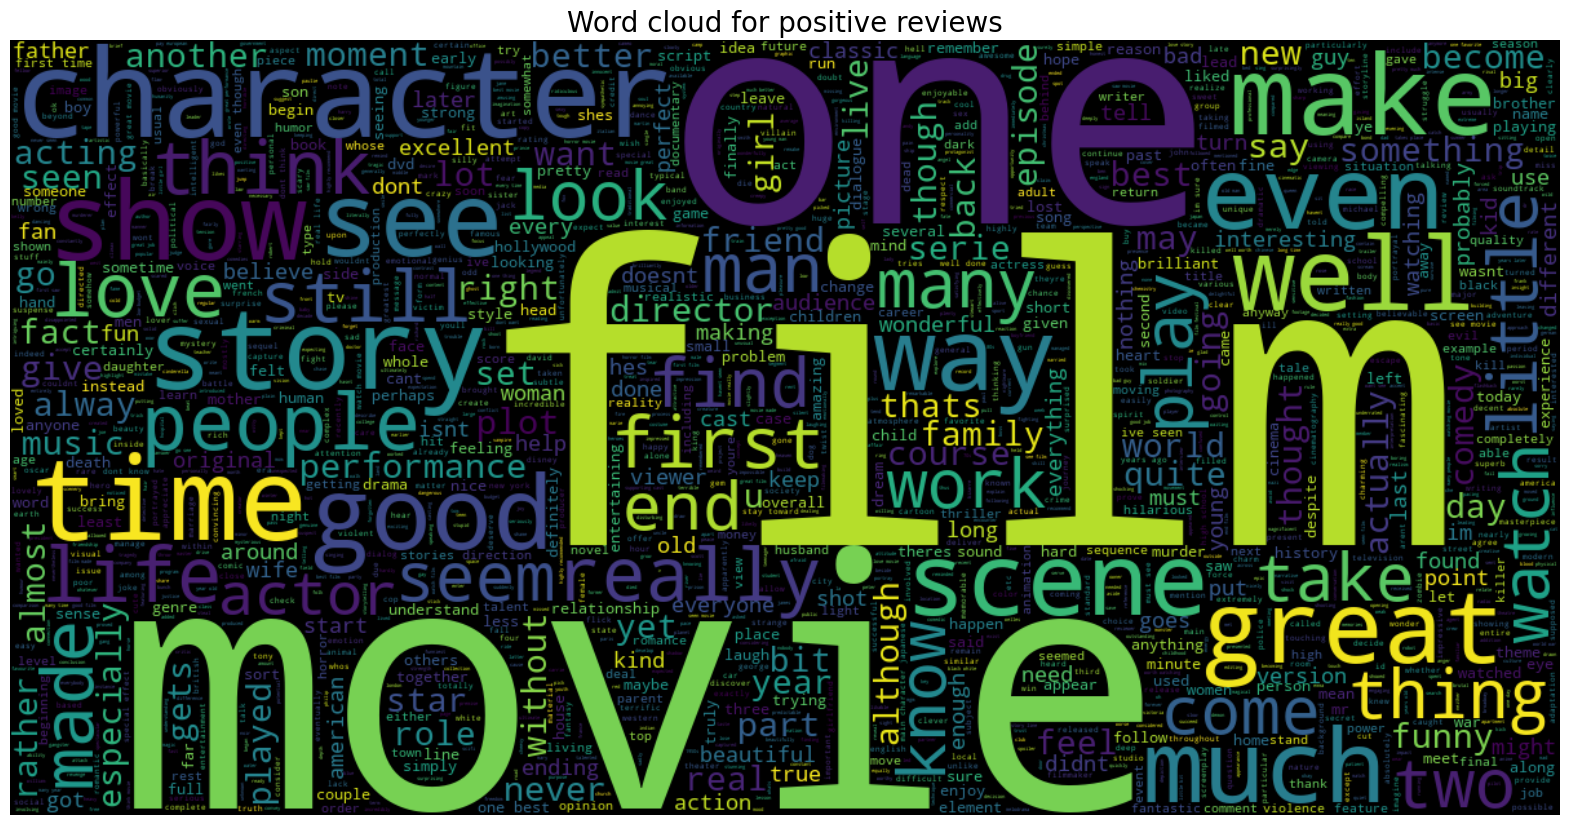

In [66]:
#word cloud for positive reviews
positive_data = df[df.sentiment == 1]['review']
positive_data_string = ' '.join(positive_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="black").generate(positive_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for positive reviews',fontsize = 20)
plt.show()

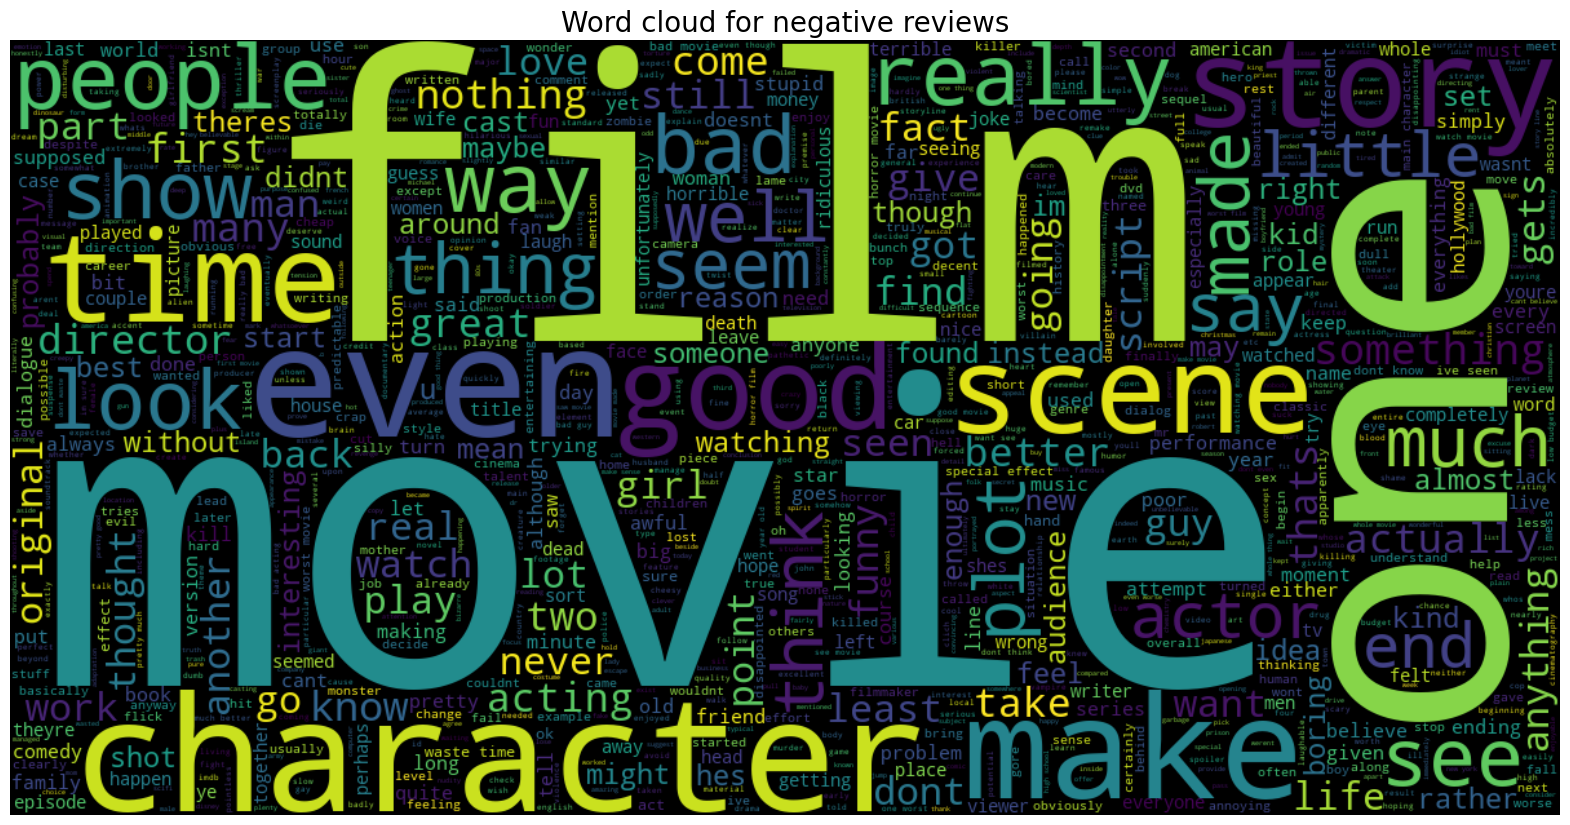

In [67]:
#word cloud for negative reviews
negative_data = df[df.sentiment == 0]['review']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="black").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

### Removing white spaces 

In [68]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus = get_corpus(df.review)
corpus[:5]

['background', 'knowledge', 'movie', 'bought', 'sounded']

**Note :** These are the first five words of the first review

### N_gram plots ( most frequent n words)

This function will give you the plots of n cosecutive most frequent words used together in a sequence 

In [69]:
def get_ngrams(review, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(review)
    bag_of_words = vec.transform(review) #sparse matrix of count_vectorizer
    sum_words = bag_of_words.sum(axis=0) #total number of words
    sum_words = np.array(sum_words)[0].tolist() #convert to list
    words_freq = [(word, sum_words[idx]) for word, idx in vec.vocabulary_.items()] #get word freqency for word location in count vec
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #key is used to perform sorting using word_freqency 
    return words_freq[:n]

### Unigram analysis (most frequent one word)

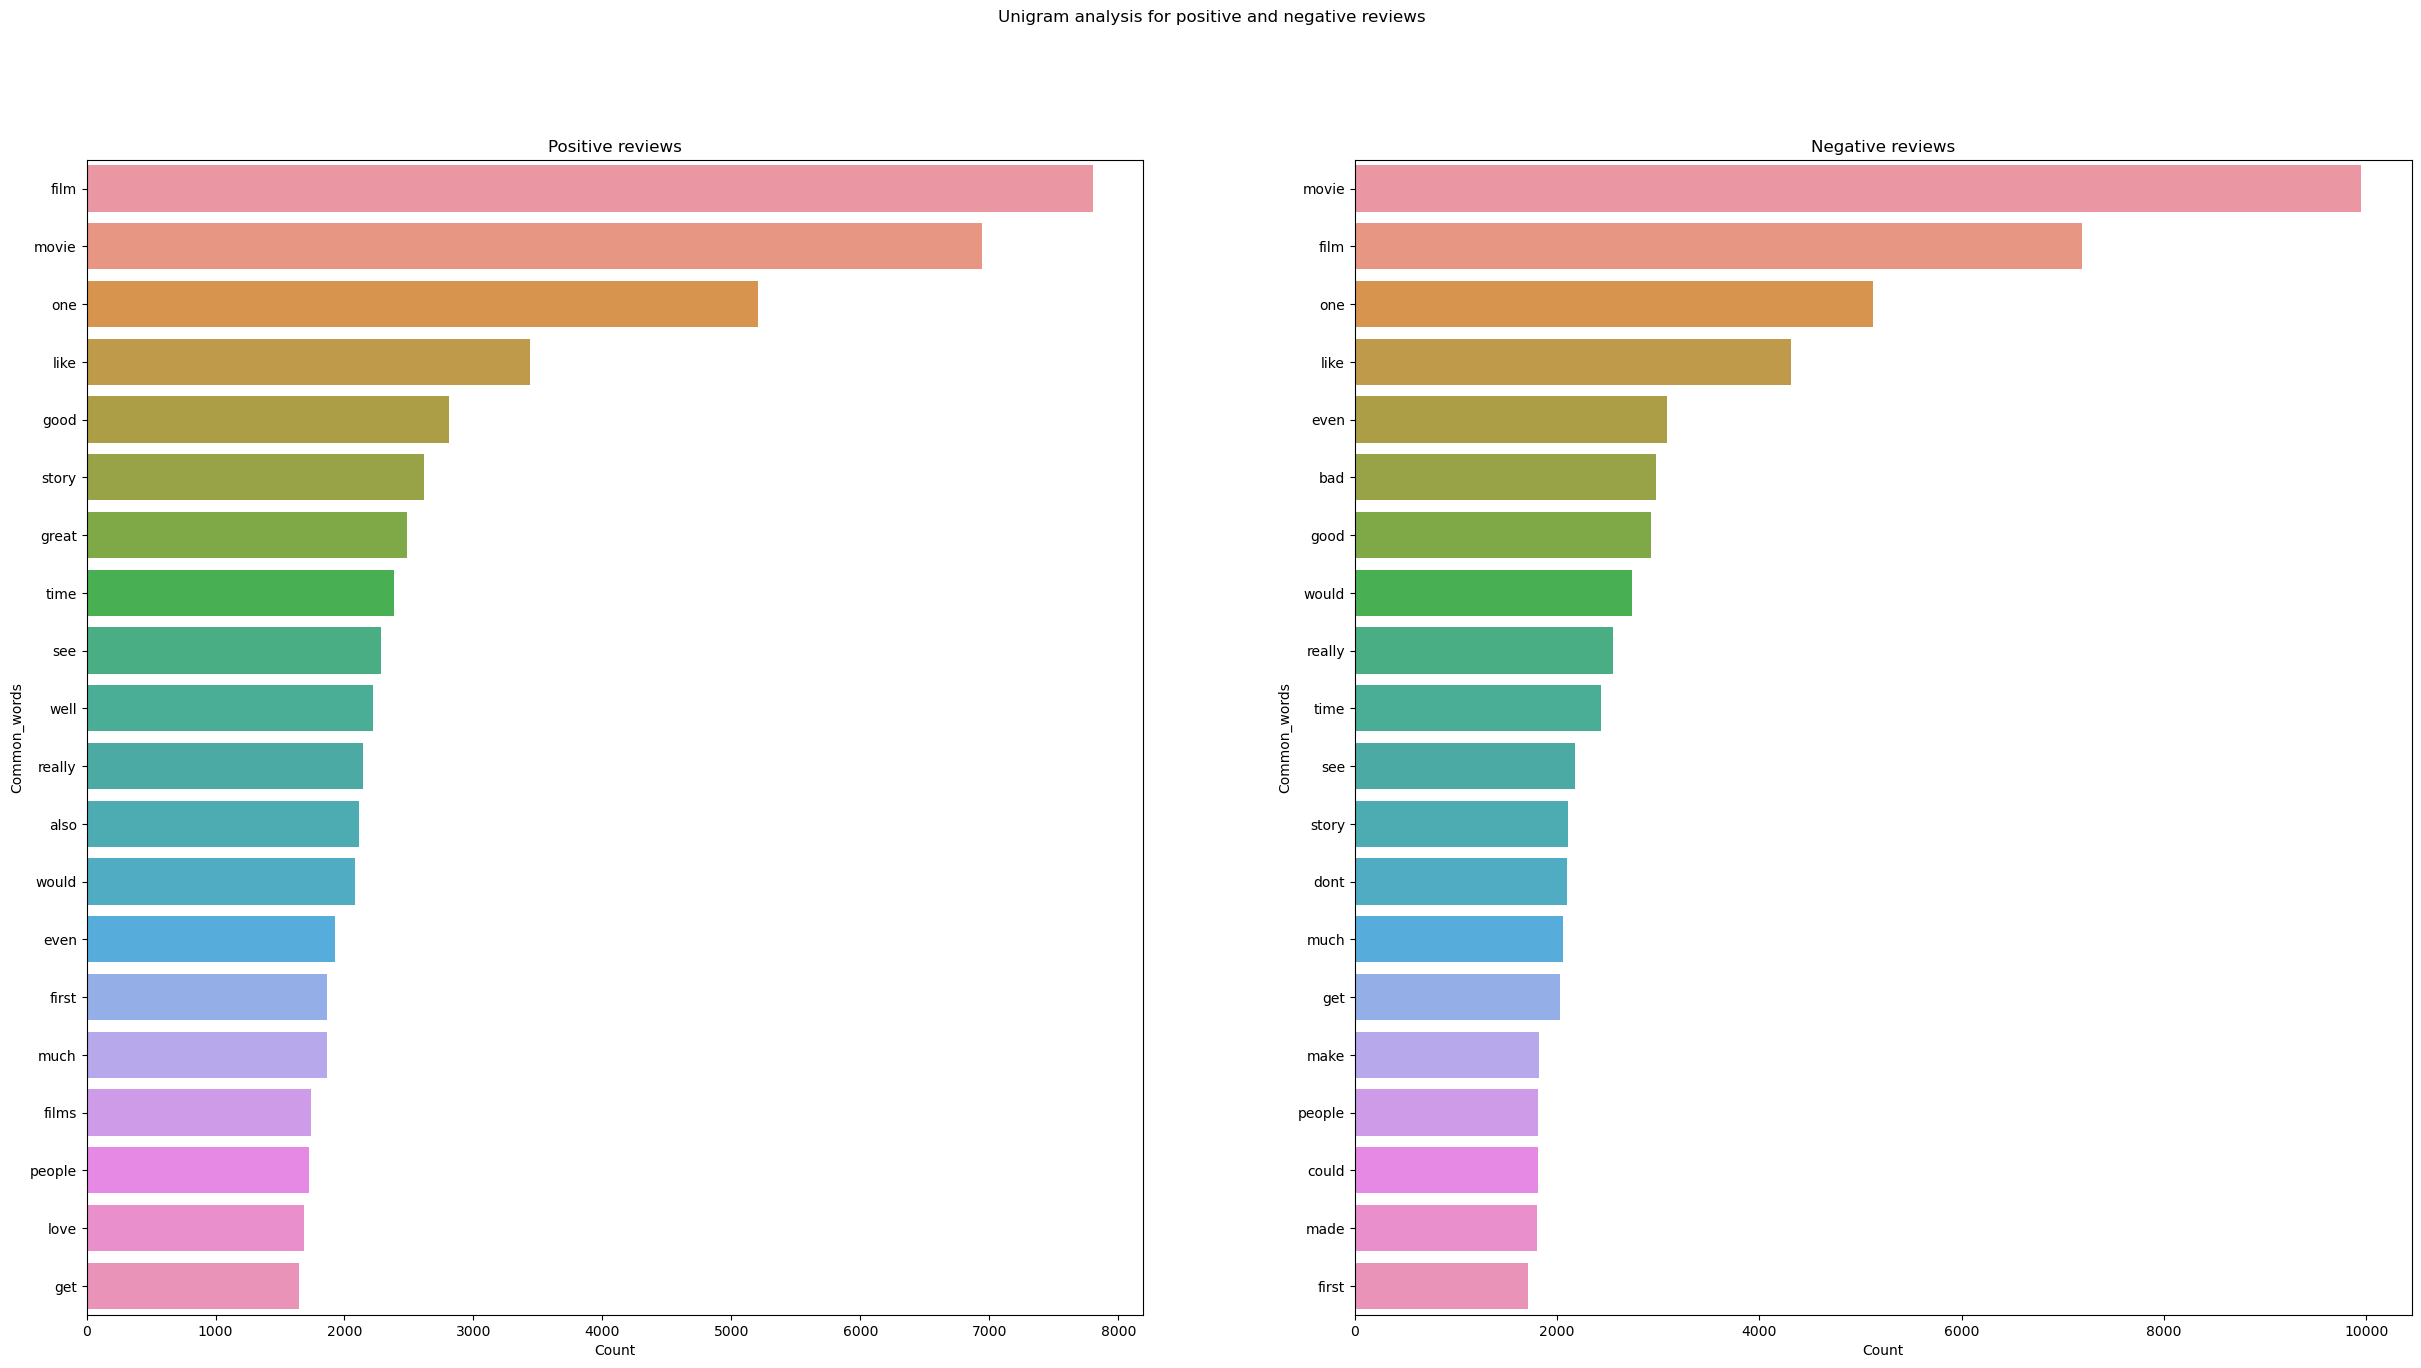

In [70]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
uni_positive = get_ngrams(positive_data,20,1)
uni_positive = dict(uni_positive)
temp = pd.DataFrame(list(uni_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
uni_negative = get_ngrams(negative_data,20,1)
uni_negative = dict(uni_negative)
temp = pd.DataFrame(list(uni_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Unigram analysis for positive and negative reviews')
plt.show()


### Bigram analysis (most frequent two words)

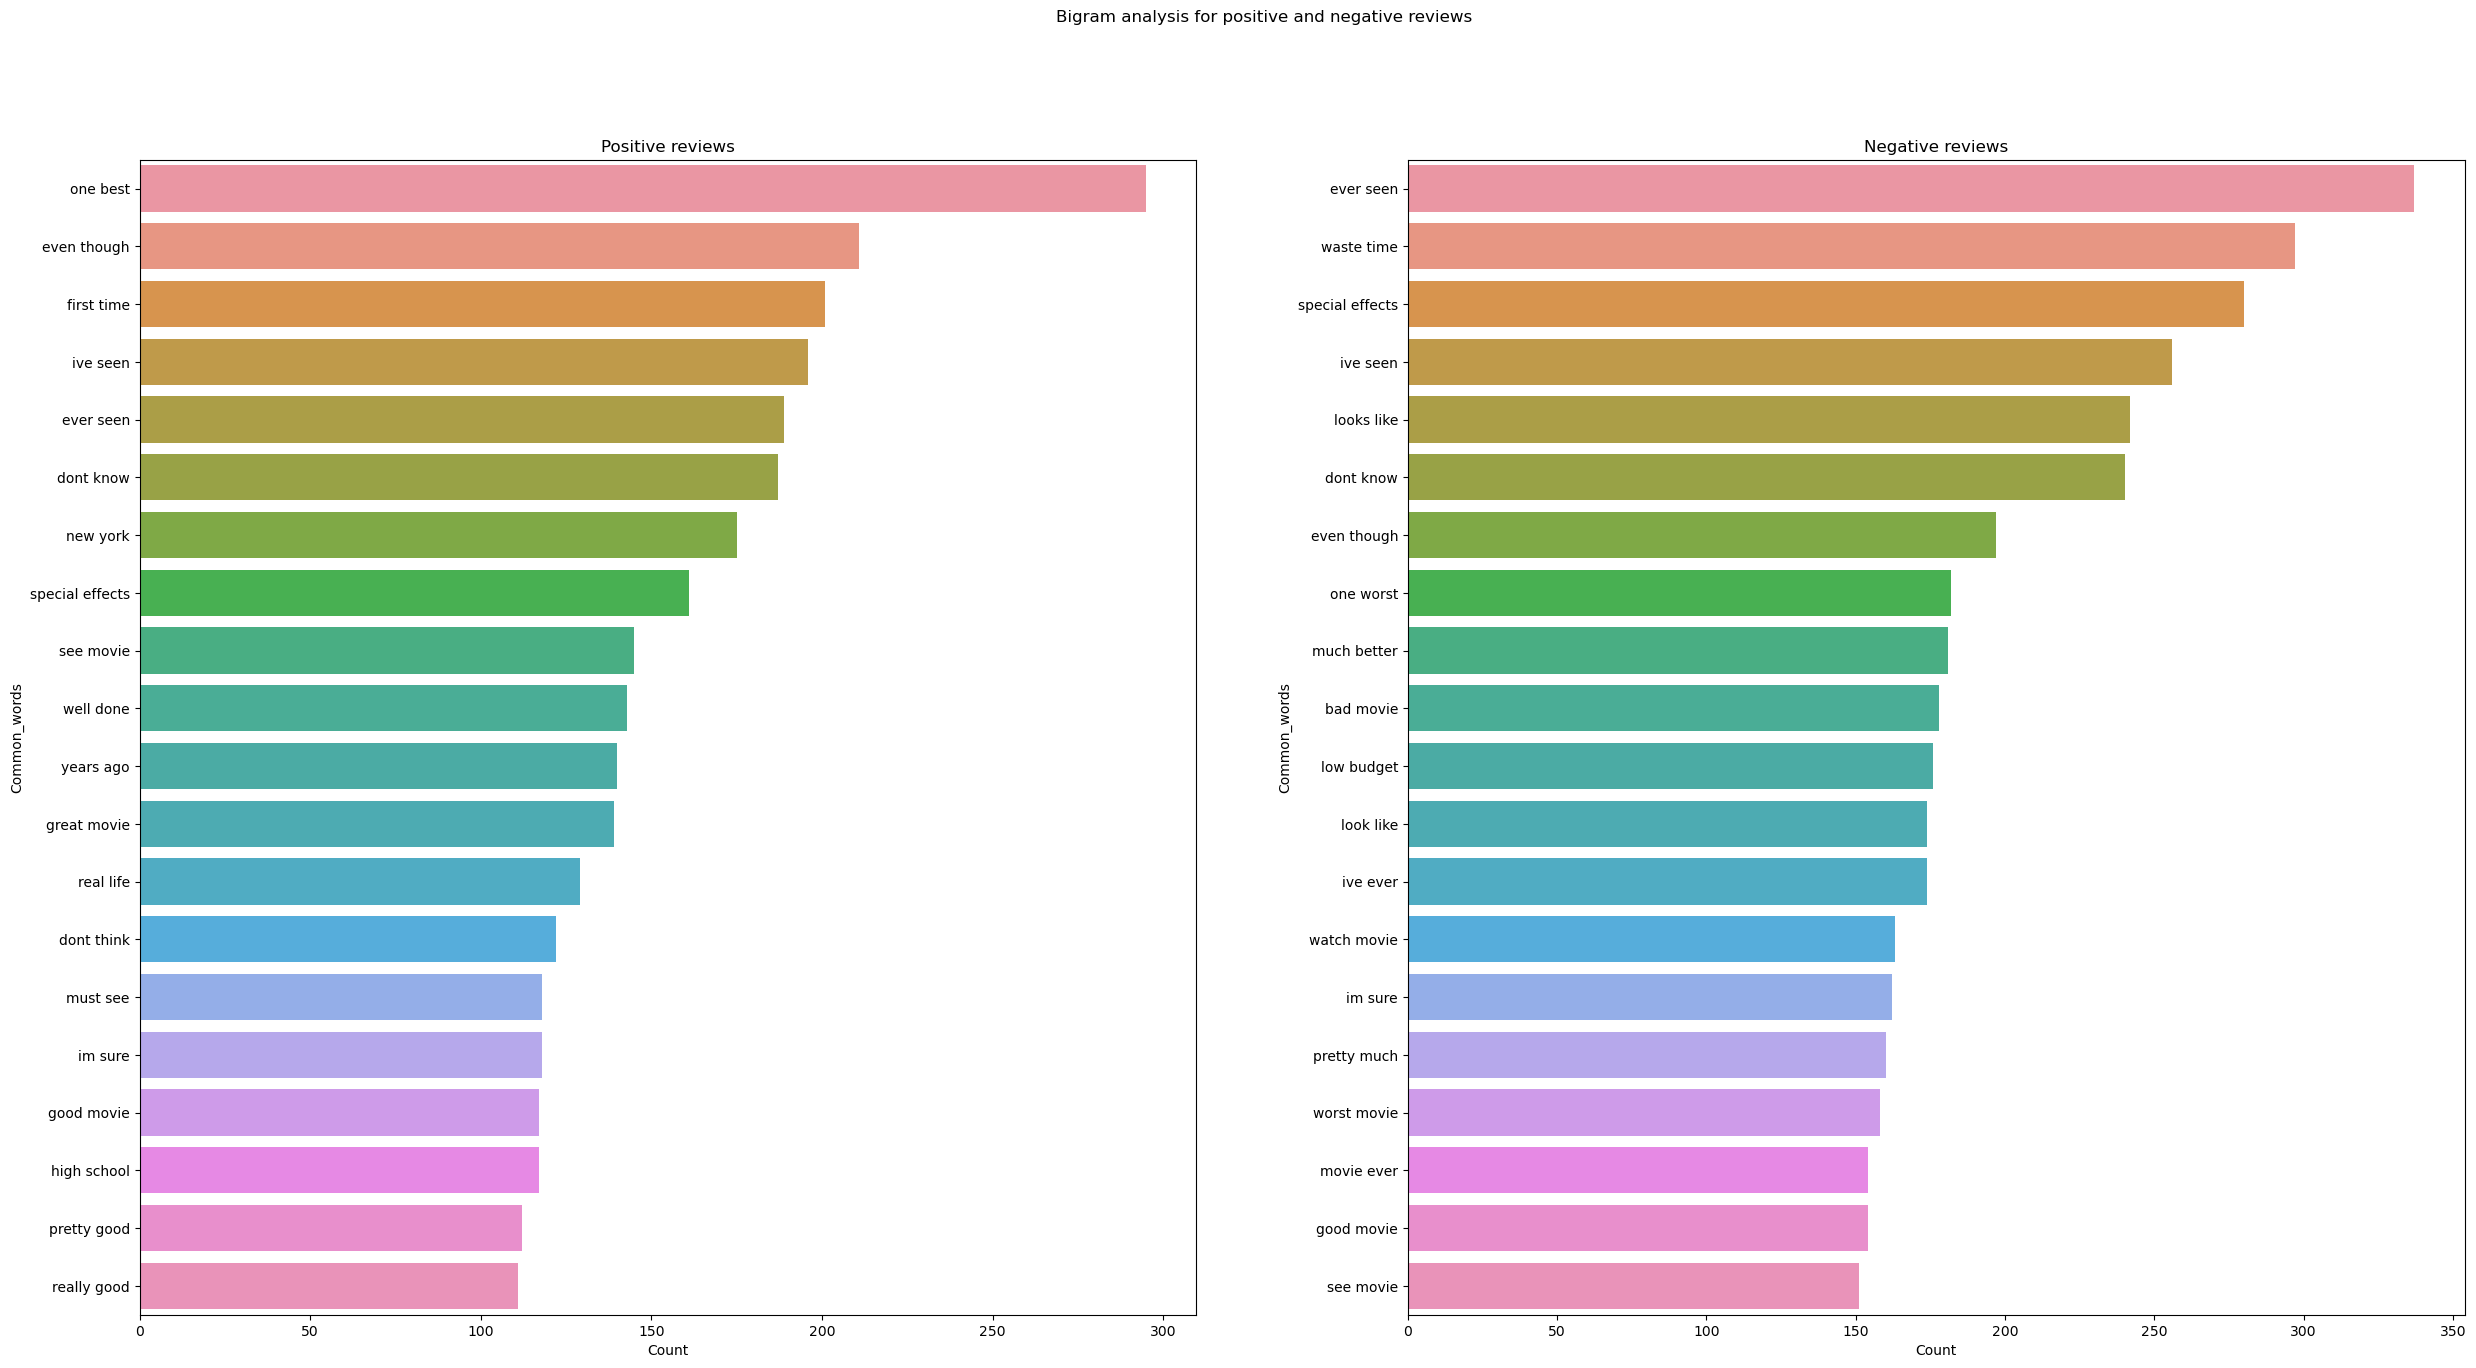

In [71]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
bi_positive = get_ngrams(positive_data,20,2)
bi_positive = dict(bi_positive)
temp = pd.DataFrame(list(bi_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
bi_negative = get_ngrams(negative_data,20,2)
bi_negative = dict(bi_negative)
temp = pd.DataFrame(list(bi_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Bigram analysis for positive and negative reviews')
plt.show()

### trigram analysis (most frequent three word)

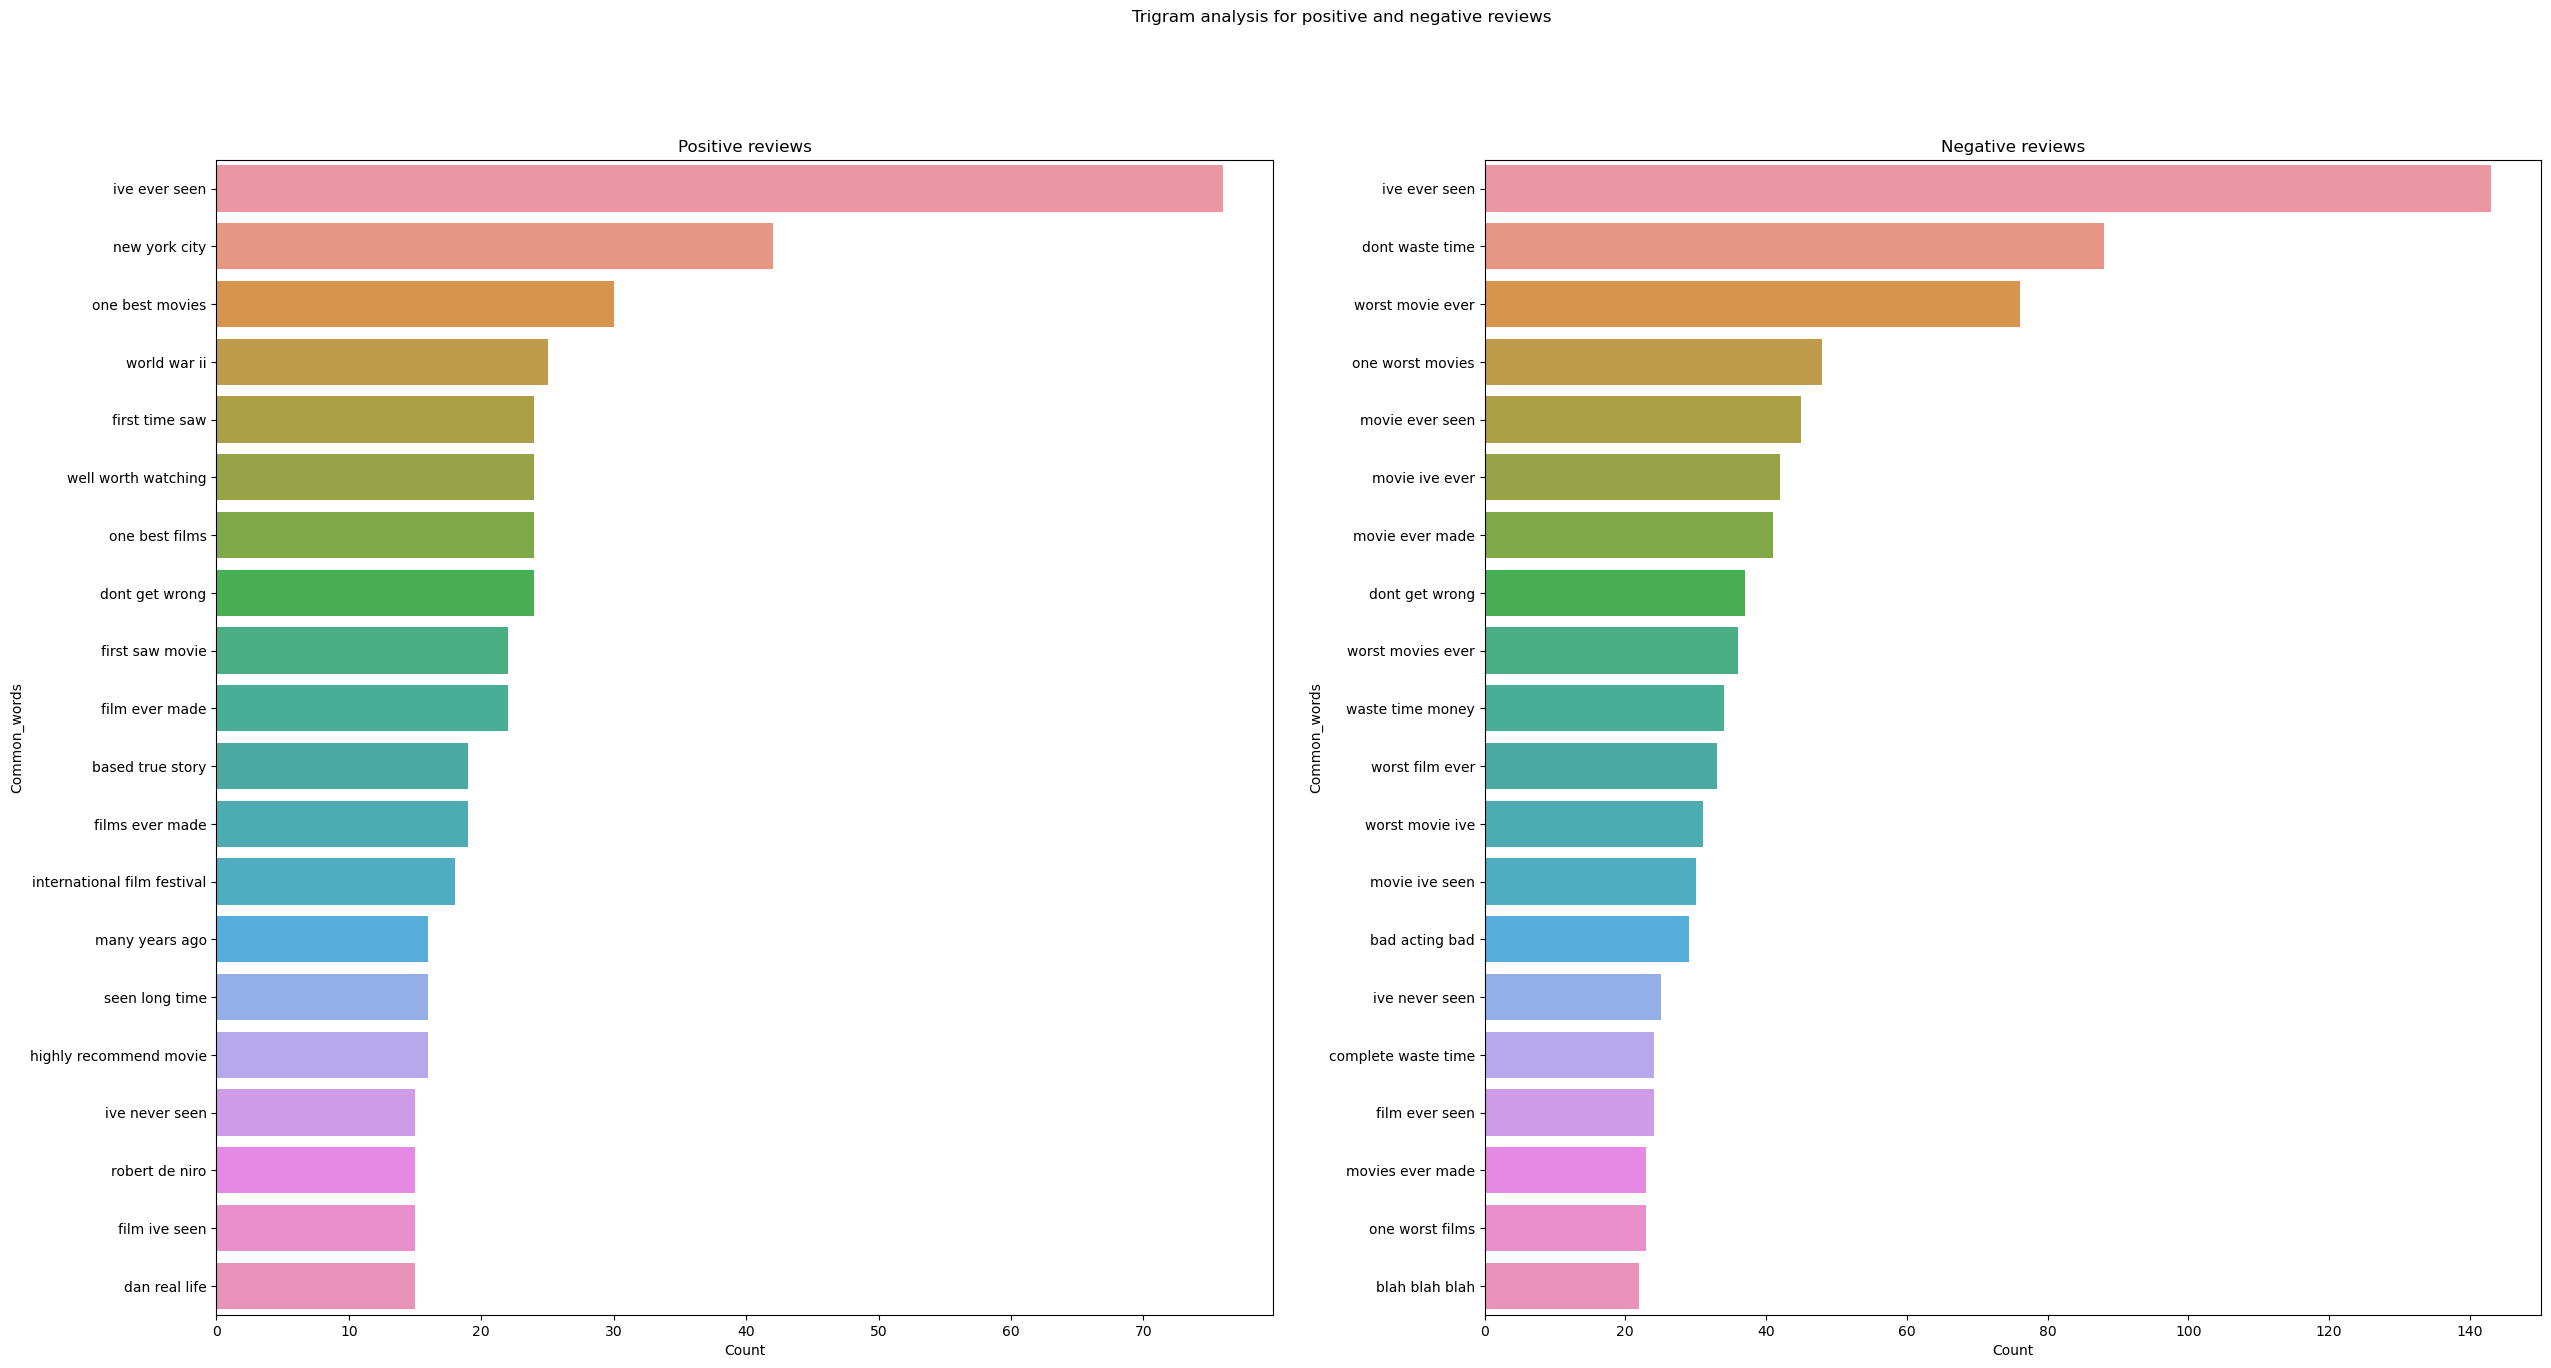

In [72]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
tri_positive = get_ngrams(positive_data,20,3)
tri_positive = dict(tri_positive)
temp = pd.DataFrame(list(tri_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
tri_negative = get_ngrams(negative_data,20,3)
tri_negative = dict(tri_negative)
temp = pd.DataFrame(list(tri_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Trigram analysis for positive and negative reviews')
plt.show()

In [73]:
# Check if the stopwords, special characters, extra spaces has removed or not
# check if the data is in lowercase or not
df.review

0       background knowledge movie bought sounded cool...
1       huge jane austen fan ordered movie amazonuk co...
2       nothing say wow anyone actually somebody sneak...
3       like jane austin novels love pride prejudice s...
4       day age incredible special movie effects one s...
                              ...                        
9995    first saw movie back early90s first released r...
9996    nyc 2022 greenhouse effect vanished oceans gri...
9997    individuals familiar asian cinema whole aware ...
9998    kids aged 7 14 got huge kick film gave copy ki...
9999    love movie animation great pokmon movie cgi lo...
Name: review, Length: 9990, dtype: object

In [74]:
df

sentiment                                             review
0             0  background knowledge movie bought sounded cool...
1             0  huge jane austen fan ordered movie amazonuk co...
2             0  nothing say wow anyone actually somebody sneak...
3             0  like jane austin novels love pride prejudice s...
4             0  day age incredible special movie effects one s...
...         ...                                                ...
9995          1  first saw movie back early90s first released r...
9996          1  nyc 2022 greenhouse effect vanished oceans gri...
9997          1  individuals familiar asian cinema whole aware ...
9998          1  kids aged 7 14 got huge kick film gave copy ki...
9999          1  love movie animation great pokmon movie cgi lo...

[9990 rows x 2 columns]

First and last five reviews of the data 

# Label Encoding

In [75]:
#unique values of labels
label_encoder = LabelEncoder()
# Fit label encoder and transform the 'category' column
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

## Split the data 

In [76]:
#split target and features 
y = df['sentiment']
X = df.review

# Predictive Modeling

## Train-test split

In [77]:
# split the feature & target in 80% train & 20% test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7992,), (1998,), (7992,), (1998,))

# Countvectorizer

In [78]:
# Feature extraction using Count Vectorizer
vectorizer = CountVectorizer()
X_train_cv = vectorizer.fit_transform(X_train)
X_test_cv = vectorizer.transform(X_test)

# Logistic regression

In [98]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_cv, y_train)

# Make predictions for Logistic Regression
y_train_pred_lr = logistic_regression_model.predict(X_train_cv)
y_test_pred_lr = logistic_regression_model.predict(X_test_cv)

# Calculate accuracy for Logistic Regression
accuracy_train_lr = accuracy_score(y_train, y_train_pred_lr)
accuracy_test_lr = accuracy_score(y_test, y_test_pred_lr)

# Calculate precision and recall for Logistic Regression
precision_train_lr = precision_score(y_train, y_train_pred_lr)
precision_test_lr = precision_score(y_test, y_test_pred_lr)

recall_train_lr = recall_score(y_train, y_train_pred_lr)
recall_test_lr = recall_score(y_test, y_test_pred_lr)

# Calculate the AUC score for Logistic Regression
auc_train_lr = roc_auc_score(y_train, logistic_regression_model.predict_proba(X_train_cv)[:, 1])
auc_test_lr = roc_auc_score(y_test, logistic_regression_model.predict_proba(X_test_cv)[:, 1])

# Calculate the confusion matrix for Logistic Regression
confusion_matrix_train_lr = confusion_matrix(y_train, y_train_pred_lr)
confusion_matrix_test_lr = confusion_matrix(y_test, y_test_pred_lr)

# Print the results for Logistic Regression
print("Training Accuracy:", accuracy_train_lr)
print("Testing Accuracy:", accuracy_test_lr)

print("Training Precision:", precision_train_lr)
print("Testing Precision:", precision_test_lr)

print("Training Recall:", recall_train_lr)
print("Testing Recall:", recall_test_lr)

print("Training AUC Score:", auc_train_lr)
print("Testing AUC Score:", auc_test_lr)

print("Training Confusion Matrix:")
print(confusion_matrix_train_lr)

print("Testing Confusion Matrix:")
print(confusion_matrix_test_lr)


Training Accuracy: 0.9996246246246246
Testing Accuracy: 0.8723723723723724
Training Precision: 0.9994934143870314
Testing Precision: 0.8529121421520237
Training Recall: 0.9997466430200151
Testing Recall: 0.8907216494845361
Training AUC Score: 0.9999992483847318
Testing AUC Score: 0.9349071362669983
Training Confusion Matrix:
[[4043    2]
 [   1 3946]]
Testing Confusion Matrix:
[[879 149]
 [106 864]]


# AUC- ROC curve

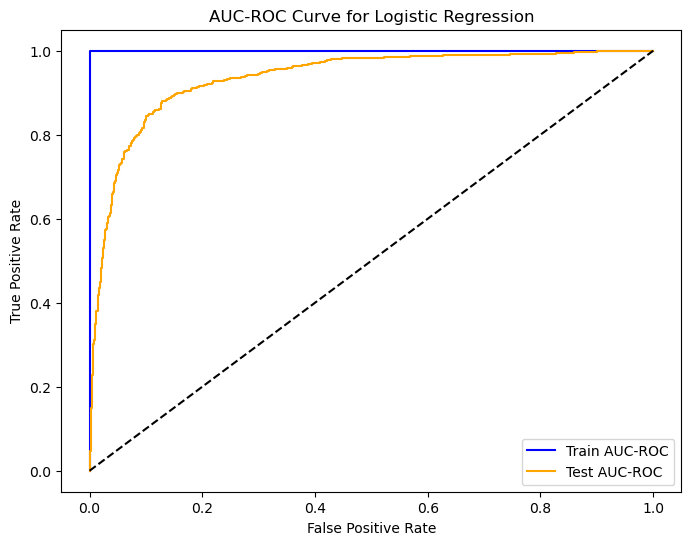

In [101]:
from sklearn.metrics import roc_curve

# Get predicted probabilities for Logistic Regression
y_train_prob_lr = logistic_regression_model.predict_proba(X_train_cv)[:, 1]
y_test_prob_lr = logistic_regression_model.predict_proba(X_test_cv)[:, 1]

# Calculate the false positive rate and true positive rate for the training data
fpr_train_lr, tpr_train_lr, thresholds_train_lr = roc_curve(y_train, y_train_prob_lr)

# Calculate the false positive rate and true positive rate for the test data
fpr_test_lr, tpr_test_lr, thresholds_test_lr = roc_curve(y_test, y_test_prob_lr)

# Plot the AUC-ROC curve for training data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_lr, tpr_train_lr, label='Train AUC-ROC', color='blue')

# Plot the AUC-ROC curve for test data
plt.plot(fpr_test_lr, tpr_test_lr, label='Test AUC-ROC', color='orange')

# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set the x-axis and y-axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the title of the plot
plt.title('AUC-ROC Curve for Logistic Regression')

# Display the legend
plt.legend()

# Show the plot
plt.show()


# Decision Tree

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define the parameter grid for hyperparameter tuning
param_grid_dt = {
    'max_depth': [10,30],  # Maximum depth of the tree
    'min_samples_split': [2, 10],  # Minimum number of samples required to split an internal node
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

# Create an instance of the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=10)

# Create GridSearchCV object with the classifier and parameter grid
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5)

# Fit the grid search to the training data
grid_search_dt.fit(X_train_cv, y_train)  # Assuming X_train_cv is the CountVectorizer transformed training data

# Get the best parameters and the best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params_dt)
print("Best Score:", best_score_dt)

# Use the best parameters to create a new Decision Tree classifier
best_dt_classifier = DecisionTreeClassifier(**best_params_dt)

# Fit the classifier to the training data
best_dt_classifier.fit(X_train_cv, y_train)  # Assuming X_train_cv is the CountVectorizer transformed training data

# Make predictions and calculate accuracy for Decision Tree
y_train_pred_dt = best_dt_classifier.predict(X_train_cv)
y_test_pred_dt = best_dt_classifier.predict(X_test_cv)

# Calculate accuracy for train and test sets
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
accuracy_test_dt = accuracy_score(y_test, y_test_pred_dt)

# Calculate precision, recall, and F1 score for train set
precision_train_dt = precision_score(y_train, y_train_pred_dt)
recall_train_dt = recall_score(y_train, y_train_pred_dt)
f1_train_dt = f1_score(y_train, y_train_pred_dt)

# Calculate precision, recall, and F1 score for test set
precision_test_dt = precision_score(y_test, y_test_pred_dt)
recall_test_dt = recall_score(y_test, y_test_pred_dt)
f1_test_dt = f1_score(y_test, y_test_pred_dt)

# Calculate AUC score for train and test sets
y_train_prob_dt = best_dt_classifier.predict_proba(X_train_cv)[:, 1]
y_test_prob_dt = best_dt_classifier.predict_proba(X_test_cv)[:, 1]
auc_train_dt = roc_auc_score(y_train, y_train_prob_dt)
auc_test_dt = roc_auc_score(y_test, y_test_prob_dt)

# Calculate confusion matrix for train and test sets
confusion_matrix_train_dt = confusion_matrix(y_train, y_train_pred_dt)
confusion_matrix_test_dt = confusion_matrix(y_test, y_test_pred_dt)

# Print the results for Decision Tree
print("Decision Tree - Best Parameters:", best_params_dt)
print("Decision Tree - Training Accuracy:", accuracy_train_dt)
print("Decision Tree - Testing Accuracy:", accuracy_test_dt)
print("Decision Tree - Training Precision:", precision_train_dt)
print("Decision Tree - Training Recall:", recall_train_dt)
print("Decision Tree - Training F1 Score:", f1_train_dt)
print("Decision Tree - Testing Precision:", precision_test_dt)
print("Decision Tree - Testing Recall:", recall_test_dt)
print("Decision Tree - Testing F1 Score:", f1_test_dt)
print("Decision Tree - Training AUC Score:", auc_train_dt)
print("Decision Tree - Testing AUC Score:", auc_test_dt)
print("Decision Tree - Training Confusion Matrix:")
print(confusion_matrix_train_dt)
print("Decision Tree - Testing Confusion Matrix:")
print(confusion_matrix_test_dt)

Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 10}
Best Score: 0.7134655498860755
Decision Tree - Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 10}
Decision Tree - Training Accuracy: 0.909034034034034
Decision Tree - Testing Accuracy: 0.7107107107107107
Decision Tree - Training Precision: 0.8822412155745489
Decision Tree - Training Recall: 0.9414745376235115
Decision Tree - Training F1 Score: 0.9108959431302857
Decision Tree - Testing Precision: 0.6863117870722434
Decision Tree - Testing Recall: 0.7443298969072165
Decision Tree - Testing F1 Score: 0.7141444114737885
Decision Tree - Training AUC Score: 0.9648459204358868
Decision Tree - Testing AUC Score: 0.726482710898953
Decision Tree - Training Confusion Matrix:
[[3549  496]
 [ 231 3716]]
Decision Tree - Testing Confusion Matrix:
[[698 330]
 [248 722]]


# AUC- ROC Curve

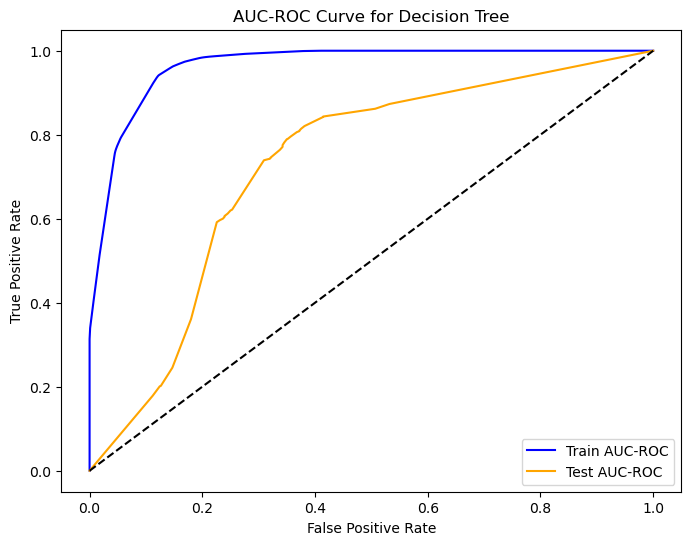

In [103]:
# Calculate the false positive rate and true positive rate for the training data
fpr_train_dt, tpr_train_dt, thresholds_train_dt = roc_curve(y_train, y_train_prob_dt)

# Calculate the false positive rate and true positive rate for the test data
fpr_test_dt, tpr_test_dt, thresholds_test_dt = roc_curve(y_test, y_test_prob_dt)

# Plot the AUC-ROC curve for training data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_dt, tpr_train_dt, label='Train AUC-ROC', color='blue')

# Plot the AUC-ROC curve for test data
plt.plot(fpr_test_dt, tpr_test_dt, label='Test AUC-ROC', color='orange')

# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set the x-axis and y-axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the title of the plot
plt.title('AUC-ROC Curve for Decision Tree')

# Display the legend
plt.legend()

# Show the plot
plt.show()

# Random Forest

Best Parameters: {'bootstrap': False, 'max_depth': 30, 'n_estimators': 100}
Best Score: 0.8404640415904497
Random Forest - Best Parameters: {'bootstrap': False, 'max_depth': 30, 'n_estimators': 100}
Random Forest - Training Accuracy: 0.9868618618618619
Random Forest - Testing Accuracy: 0.8448448448448449
Random Forest - Training Precision: 0.9788135593220338
Random Forest - Training Recall: 0.994932860400304
Random Forest - Training F1 Score: 0.9868073878627968
Random Forest - Testing Precision: 0.83
Random Forest - Testing Recall: 0.8556701030927835
Random Forest - Testing F1 Score: 0.8426395939086294
Random Forest - Training AUC Score: 0.9994029043040309
Random Forest - Testing AUC Score: 0.9250812306951743
Random Forest - Training Confusion Matrix:
[[3960   85]
 [  20 3927]]
Random Forest - Testing Confusion Matrix:
[[858 170]
 [140 830]]


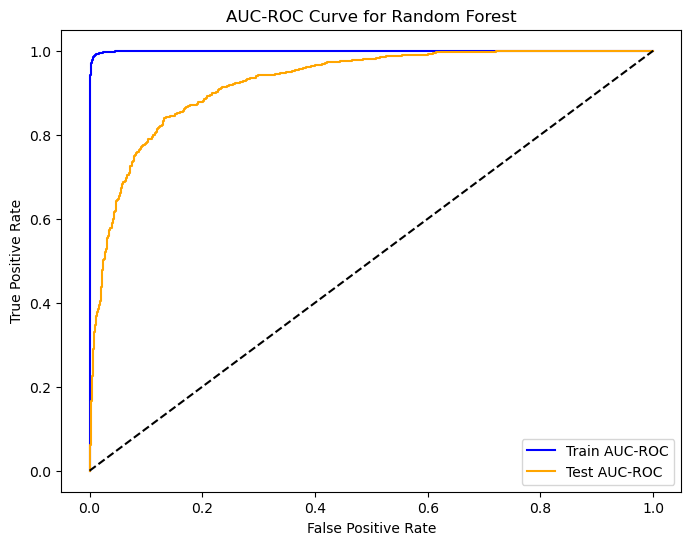

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50,100],  # Number of trees in the forest
    'max_depth': [10, 30],  # Maximum depth of the trees
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Create an instance of the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=10)

# Create GridSearchCV object with the classifier and parameter grid
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5)

# Fit the grid search to the training data
grid_search_rf.fit(X_train_cv, y_train)  # Assuming X_train_cv is the CountVectorizer transformed training data

# Get the best parameters and the best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params_rf)
print("Best Score:", best_score_rf)

# Use the best parameters to create a new Random Forest classifier
best_rf_classifier = RandomForestClassifier(**best_params_rf)

# Fit the classifier to the training data
best_rf_classifier.fit(X_train_cv, y_train)  # Assuming X_train_cv is the CountVectorizer transformed training data

# Make predictions and calculate accuracy for Random Forest
y_train_pred_rf = best_rf_classifier.predict(X_train_cv)
y_test_pred_rf = best_rf_classifier.predict(X_test_cv)

# Calculate accuracy for train and test sets
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)

# Calculate precision, recall, and F1 score for train set
precision_train_rf = precision_score(y_train, y_train_pred_rf)
recall_train_rf = recall_score(y_train, y_train_pred_rf)
f1_train_rf = f1_score(y_train, y_train_pred_rf)

# Calculate precision, recall, and F1 score for test set
precision_test_rf = precision_score(y_test, y_test_pred_rf)
recall_test_rf = recall_score(y_test, y_test_pred_rf)
f1_test_rf = f1_score(y_test, y_test_pred_rf)

# Calculate AUC score for train and test sets
y_train_prob_rf = best_rf_classifier.predict_proba(X_train_cv)[:, 1]
y_test_prob_rf = best_rf_classifier.predict_proba(X_test_cv)[:, 1]
auc_train_rf = roc_auc_score(y_train, y_train_prob_rf)
auc_test_rf = roc_auc_score(y_test, y_test_prob_rf)

# Calculate confusion matrix for train and test sets
confusion_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)
confusion_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)

# Print the results for Random Forest
print("Random Forest - Best Parameters:", best_params_rf)
print("Random Forest - Training Accuracy:", accuracy_train_rf)
print("Random Forest - Testing Accuracy:", accuracy_test_rf)
print("Random Forest - Training Precision:", precision_train_rf)
print("Random Forest - Training Recall:", recall_train_rf)
print("Random Forest - Training F1 Score:", f1_train_rf)
print("Random Forest - Testing Precision:", precision_test_rf)
print("Random Forest - Testing Recall:", recall_test_rf)
print("Random Forest - Testing F1 Score:", f1_test_rf)
print("Random Forest - Training AUC Score:", auc_train_rf)
print("Random Forest - Testing AUC Score:", auc_test_rf)
print("Random Forest - Training Confusion Matrix:")
print(confusion_matrix_train_rf)
print("Random Forest - Testing Confusion Matrix:")
print(confusion_matrix_test_rf)

# Calculate the false positive rate and true positive rate for the training data
fpr_train_rf, tpr_train_rf, thresholds_train_rf = roc_curve(y_train, y_train_prob_rf)

# Calculate the false positive rate and true positive rate for the test data
fpr_test_rf, tpr_test_rf, thresholds_test_rf = roc_curve(y_test, y_test_prob_rf)

# Plot the AUC-ROC curve for training data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_rf, tpr_train_rf, label='Train AUC-ROC', color='blue')

# Plot the AUC-ROC curve for test data
plt.plot(fpr_test_rf, tpr_test_rf, label='Test AUC-ROC', color='orange')

# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set the x-axis and y-axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the title of the plot
plt.title('AUC-ROC Curve for Random Forest')

# Display the legend
plt.legend()

# Show the plot
plt.show()


# TF-IDF

In [108]:
# Feature extraction using TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression

In [115]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_auc_score

# Build and train the Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_cv, y_train)

# Make predictions for Logistic Regression
y_train_pred_lr = logistic_regression_model.predict(X_train_cv)
y_test_pred_lr = logistic_regression_model.predict(X_test_cv)

# Calculate accuracy for Logistic Regression
accuracy_train_lr = accuracy_score(y_train, y_train_pred_lr)
accuracy_test_lr = accuracy_score(y_test, y_test_pred_lr)

# Calculate precision and recall for Logistic Regression
precision_train_lr = precision_score(y_train, y_train_pred_lr)
precision_test_lr = precision_score(y_test, y_test_pred_lr)

recall_train_lr = recall_score(y_train, y_train_pred_lr)
recall_test_lr = recall_score(y_test, y_test_pred_lr)

# Calculate the AUC score for Logistic Regression
auc_train_lr = roc_auc_score(y_train, logistic_regression_model.predict_proba(X_train_cv)[:, 1])
auc_test_lr = roc_auc_score(y_test, logistic_regression_model.predict_proba(X_test_cv)[:, 1])

# Calculate the confusion matrix for Logistic Regression
confusion_matrix_train_lr = confusion_matrix(y_train, y_train_pred_lr)
confusion_matrix_test_lr = confusion_matrix(y_test, y_test_pred_lr)

# Print the results for Logistic Regression
print("Training Accuracy:", accuracy_train_lr)
print("Testing Accuracy:", accuracy_test_lr)

print("Training Precision:", precision_train_lr)
print("Testing Precision:", precision_test_lr)

print("Training Recall:", recall_train_lr)
print("Testing Recall:", recall_test_lr)

print("Training AUC Score:", auc_train_lr)
print("Testing AUC Score:", auc_test_lr)

print("Training Confusion Matrix:")
print(confusion_matrix_train_lr)

print("Testing Confusion Matrix:")
print(confusion_matrix_test_lr)



Training Accuracy: 0.9991241241241241
Testing Accuracy: 0.505005005005005
Training Precision: 0.9987335359675785
Testing Precision: 0.49120992761116855
Training Recall: 0.9994930291508238
Testing Recall: 0.4886831275720165
Training AUC Score: 0.9999959286996298
Testing AUC Score: 0.4997513216053394
Training Confusion Matrix:
[[4042    5]
 [   2 3943]]
Testing Confusion Matrix:
[[534 492]
 [497 475]]


# AUC -Roc curve

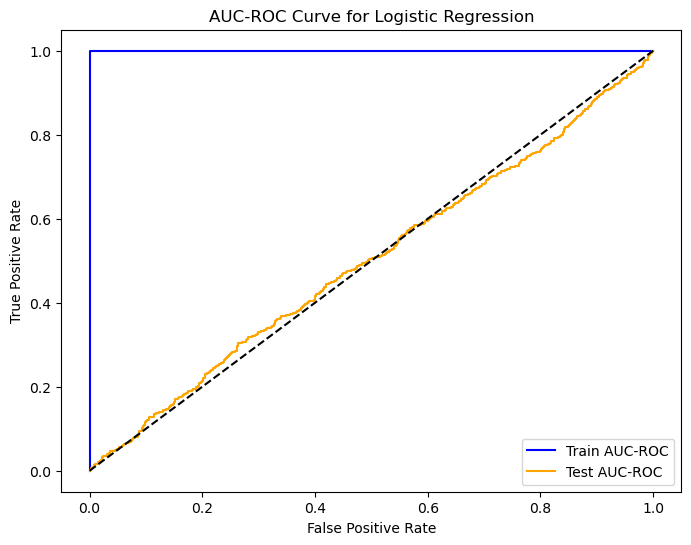

In [116]:
from sklearn.metrics import roc_curve

# Calculate probabilities for Logistic Regression
y_train_prob_lr = logistic_regression_model.predict_proba(X_train_cv)[:, 1]
y_test_prob_lr = logistic_regression_model.predict_proba(X_test_cv)[:, 1]

# Calculate the false positive rate and true positive rate for the training data
fpr_train_lr, tpr_train_lr, thresholds_train_lr = roc_curve(y_train, y_train_prob_lr)

# Calculate the false positive rate and true positive rate for the test data
fpr_test_lr, tpr_test_lr, thresholds_test_lr = roc_curve(y_test, y_test_prob_lr)

# Plot the AUC-ROC curve for training data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_lr, tpr_train_lr, label='Train AUC-ROC', color='blue')

# Plot the AUC-ROC curve for test data
plt.plot(fpr_test_lr, tpr_test_lr, label='Test AUC-ROC', color='orange')

# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set the x-axis and y-axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the title of the plot
plt.title('AUC-ROC Curve for Logistic Regression')

# Display the legend
plt.legend()

# Show the plot
plt.show()


# Decision Tree

Best Parameters: {'max_depth': 30, 'min_samples_split': 10}
Best Score: 0.7112099943566106
Decision Tree - Best Parameters: {'max_depth': 30, 'min_samples_split': 10}
Decision Tree - Training Accuracy: 0.9066566566566566
Decision Tree - Testing Accuracy: 0.7122122122122122
Decision Tree - Training Precision: 0.8542635658914729
Decision Tree - Training Recall: 0.9776932826362484
Decision Tree - Training F1 Score: 0.9118203309692672
Decision Tree - Testing Precision: 0.682277318640955
Decision Tree - Testing Recall: 0.76440329218107
Decision Tree - Testing F1 Score: 0.7210092188258127
Decision Tree - Training AUC Score: 0.9652663585631818
Decision Tree - Testing AUC Score: 0.7197579998235186
Decision Tree - Training Confusion Matrix:
[[3389  658]
 [  88 3857]]
Decision Tree - Testing Confusion Matrix:
[[680 346]
 [229 743]]


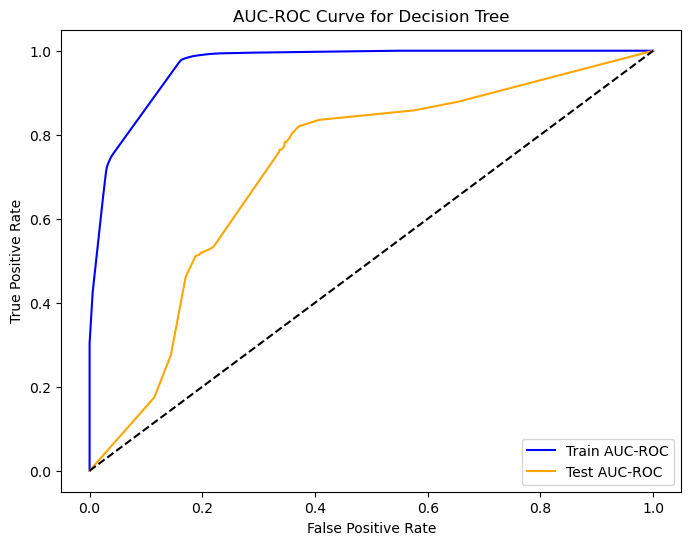

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Define the parameter grid for hyperparameter tuning
param_grid_dt = {
    'max_depth': [10, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 10],  # Minimum number of samples required to split an internal node
}

# Create an instance of the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=10)

# Create GridSearchCV object with the classifier and parameter grid
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5)

# Fit the grid search to the training data
grid_search_dt.fit(X_train_tfidf, y_train)

# Get the best parameters and the best score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params_dt)
print("Best Score:", best_score_dt)

# Use the best parameters to create a new Decision Tree classifier
best_dt_classifier = DecisionTreeClassifier(**best_params_dt)

# Fit the classifier to the training data
best_dt_classifier.fit(X_train_tfidf, y_train)

# Make predictions for Decision Tree
y_train_prob_dt = best_dt_classifier.predict_proba(X_train_tfidf)[:, 1]
y_test_prob_dt = best_dt_classifier.predict_proba(X_test_tfidf)[:, 1]
y_train_pred_dt = best_dt_classifier.predict(X_train_tfidf)
y_test_pred_dt = best_dt_classifier.predict(X_test_tfidf)

# Calculate accuracy for train and test sets
accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
accuracy_test_dt = accuracy_score(y_test, y_test_pred_dt)

# Calculate precision, recall, and F1 score for train set
precision_train_dt = precision_score(y_train, y_train_pred_dt)
recall_train_dt = recall_score(y_train, y_train_pred_dt)
f1_train_dt = f1_score(y_train, y_train_pred_dt)

# Calculate precision, recall, and F1 score for test set
precision_test_dt = precision_score(y_test, y_test_pred_dt)
recall_test_dt = recall_score(y_test, y_test_pred_dt)
f1_test_dt = f1_score(y_test, y_test_pred_dt)

# Calculate AUC score for train and test sets
auc_train_dt = roc_auc_score(y_train, y_train_prob_dt)
auc_test_dt = roc_auc_score(y_test, y_test_prob_dt)

# Calculate confusion matrix for train and test sets
confusion_matrix_train_dt = confusion_matrix(y_train, y_train_pred_dt)
confusion_matrix_test_dt = confusion_matrix(y_test, y_test_pred_dt)

# Print the results for Decision Tree
print("Decision Tree - Best Parameters:", best_params_dt)
print("Decision Tree - Training Accuracy:", accuracy_train_dt)
print("Decision Tree - Testing Accuracy:", accuracy_test_dt)
print("Decision Tree - Training Precision:", precision_train_dt)
print("Decision Tree - Training Recall:", recall_train_dt)
print("Decision Tree - Training F1 Score:", f1_train_dt)
print("Decision Tree - Testing Precision:", precision_test_dt)
print("Decision Tree - Testing Recall:", recall_test_dt)
print("Decision Tree - Testing F1 Score:", f1_test_dt)
print("Decision Tree - Training AUC Score:", auc_train_dt)
print("Decision Tree - Testing AUC Score:", auc_test_dt)
print("Decision Tree - Training Confusion Matrix:")
print(confusion_matrix_train_dt)
print("Decision Tree - Testing Confusion Matrix:")
print(confusion_matrix_test_dt)

# Plot the AUC-ROC curve for Decision Tree
fpr_train_dt, tpr_train_dt, _ = roc_curve(y_train, y_train_prob_dt)
fpr_test_dt, tpr_test_dt, _ = roc_curve(y_test, y_test_prob_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train_dt, tpr_train_dt, label='Train AUC-ROC', color='blue')
plt.plot(fpr_test_dt, tpr_test_dt, label='Test AUC-ROC', color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Decision Tree')
plt.legend()
plt.show()


# Random Forest

Best Parameters: {'bootstrap': False, 'max_depth': 30, 'n_estimators': 100}
Best Score: 0.8315807517370446
Random Forest - Best Parameters: {'bootstrap': False, 'max_depth': 30, 'n_estimators': 100}
Random Forest - Training Accuracy: 0.9922422422422422
Random Forest - Testing Accuracy: 0.8453453453453453
Random Forest - Training Precision: 0.984769038701623
Random Forest - Training Recall: 0.9997465145754119
Random Forest - Training F1 Score: 0.9922012578616352
Random Forest - Testing Precision: 0.8456725755995829
Random Forest - Testing Recall: 0.8343621399176955
Random Forest - Testing F1 Score: 0.8399792853443812
Random Forest - Training AUC Score: 0.9998833729032411
Random Forest - Testing AUC Score: 0.9241851771633014
Random Forest - Training Confusion Matrix:
[[3986   61]
 [   1 3944]]
Random Forest - Testing Confusion Matrix:
[[878 148]
 [161 811]]


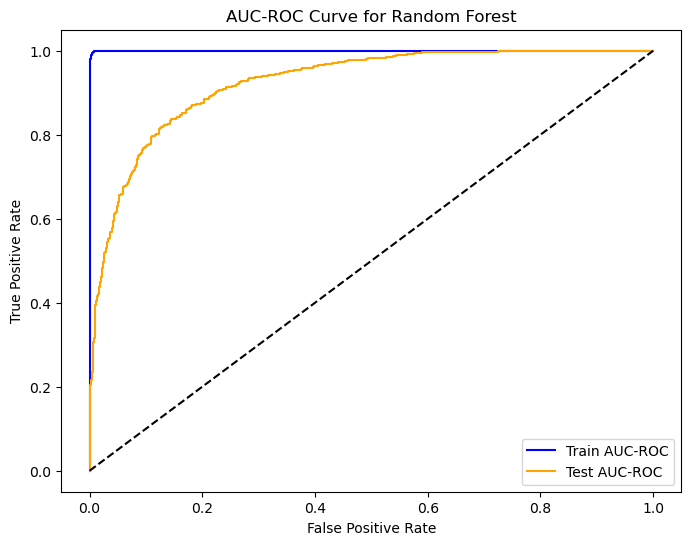

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [10, 30],  # Maximum depth of the trees
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Create an instance of the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=10)

# Create GridSearchCV object with the classifier and parameter grid
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5)

# Fit the grid search to the training data
grid_search_rf.fit(X_train_tfidf, y_train)

# Get the best parameters and the best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params_rf)
print("Best Score:", best_score_rf)

# Use the best parameters to create a new Random Forest classifier
best_rf_classifier = RandomForestClassifier(**best_params_rf)

# Fit the classifier to the training data
best_rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions for Random Forest
y_train_prob_rf = best_rf_classifier.predict_proba(X_train_tfidf)[:, 1]
y_test_prob_rf = best_rf_classifier.predict_proba(X_test_tfidf)[:, 1]
y_train_pred_rf = best_rf_classifier.predict(X_train_tfidf)
y_test_pred_rf = best_rf_classifier.predict(X_test_tfidf)

# Calculate accuracy for train and test sets
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)

# Calculate precision, recall, and F1 score for train set
precision_train_rf = precision_score(y_train, y_train_pred_rf)
recall_train_rf = recall_score(y_train, y_train_pred_rf)
f1_train_rf = f1_score(y_train, y_train_pred_rf)

# Calculate precision, recall, and F1 score for test set
precision_test_rf = precision_score(y_test, y_test_pred_rf)
recall_test_rf = recall_score(y_test, y_test_pred_rf)
f1_test_rf = f1_score(y_test, y_test_pred_rf)

# Calculate AUC score for train and test sets
auc_train_rf = roc_auc_score(y_train, y_train_prob_rf)
auc_test_rf = roc_auc_score(y_test, y_test_prob_rf)

# Calculate confusion matrix for train and test sets
confusion_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)
confusion_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)

# Print the results for Random Forest
print("Random Forest - Best Parameters:", best_params_rf)
print("Random Forest - Training Accuracy:", accuracy_train_rf)
print("Random Forest - Testing Accuracy:", accuracy_test_rf)
print("Random Forest - Training Precision:", precision_train_rf)
print("Random Forest - Training Recall:", recall_train_rf)
print("Random Forest - Training F1 Score:", f1_train_rf)
print("Random Forest - Testing Precision:", precision_test_rf)
print("Random Forest - Testing Recall:", recall_test_rf)
print("Random Forest - Testing F1 Score:", f1_test_rf)
print("Random Forest - Training AUC Score:", auc_train_rf)
print("Random Forest - Testing AUC Score:", auc_test_rf)
print("Random Forest - Training Confusion Matrix:")
print(confusion_matrix_train_rf)
print("Random Forest - Testing Confusion Matrix:")
print(confusion_matrix_test_rf)

# Plot the AUC-ROC curve for Random Forest
fpr_train_rf, tpr_train_rf, _ = roc_curve(y_train, y_train_prob_rf)
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, y_test_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train_rf, tpr_train_rf, label='Train AUC-ROC', color='blue')
plt.plot(fpr_test_rf, tpr_test_rf, label='Test AUC-ROC', color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Random Forest')
plt.legend()
plt.show()


**Conclusion :**



The high accuracy reflects the robustness of our sentiment analysis model, demonstrating its ability to make accurate predictions on the sentiment of movie reviews within the IMDB dataset.